# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [1]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


We visualize the different features of to get a feel of the distribution of the spending amounts of the products by the wholesale distributor. We plot histograms of the features along with kernel density estimate(KDE) and aloong with the maximum likelihood gaussian distribution fit.

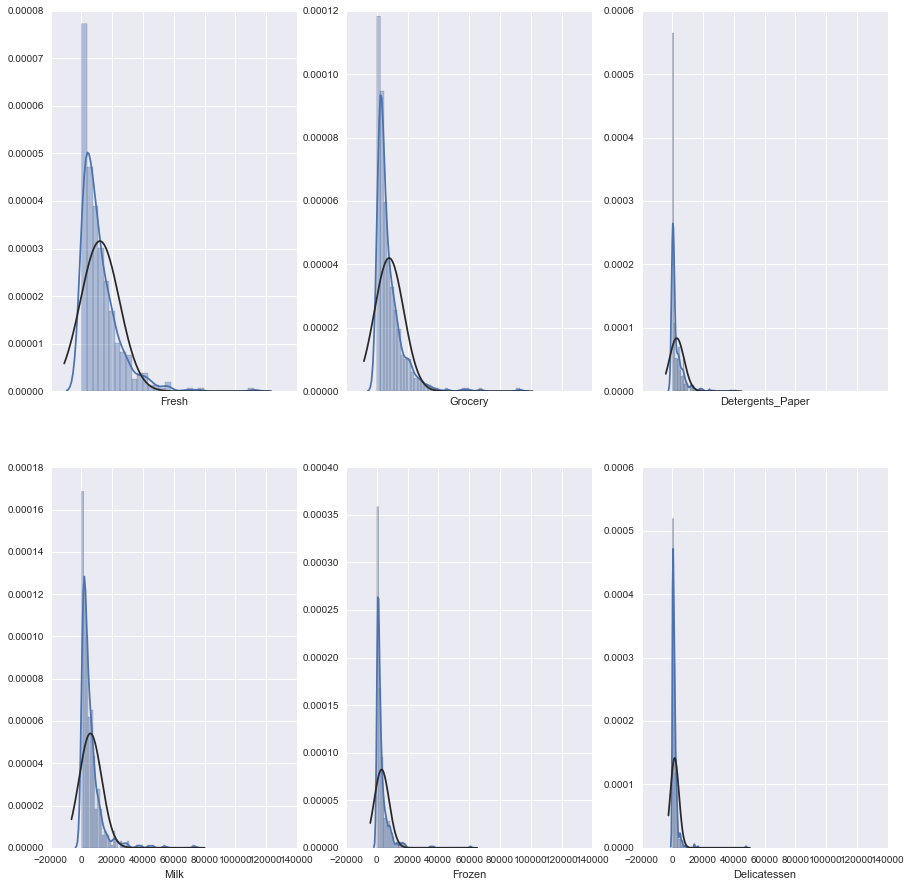

In [2]:
import seaborn as sns
from scipy.stats import norm
#Plot the features as a 
f,axes = plt.subplots(2, 3, figsize=(15, 15), sharex=True)
j=0
k=0
for i in range(6):
    
    sns.distplot(data.ix[:,i], fit=norm, kde=True, ax=axes[j,k])
    j+=1
    if (j>1):
        j=0
        k+=1
    
    #sns.distplot(data['Fresh'], fit=norm, kde=True, ax=axes[0,0])

##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer:
Using PCA I might expect to see some of the features having the least variance being reduced to one single feature. Since PCA is used for dimensionality reduction, if two features have a least variance in their feature representation, PCA would reduce these two features into a new feature which would be able to retain almost 95% of the two original features.
This task is accomplished by using a covariance matrix.
Basically PCA finds new features are constructed from old features. PCA looks for variation across the feature vectors and constructs new features which would combine the correlated features into new features. 

###PCA

In [3]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
from sklearn import preprocessing
import numpy as np
pca = PCA(n_components=6).fit(data)
dataOrg = pca.transform(data)

std_scale = preprocessing.StandardScaler()

#dataOrg.head()
#dataStd[1,:]
#dataStd[1,:]
#"""
dataStdPca = std_scale.fit_transform(data)
#Calculate the covariant Matrix
cov_mat = np.cov(dataStdPca.T)
pca_std = PCA(n_components=6)
pca_std.fit(dataStdPca)

eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print "This is the Eigen Vectors and Eigen values"
print ('\nEigenvalues \n%s' %eigen_vals)
print "This is the Eigen Vectors and Eigen values"
print ('\nEigen Vectors \n%s' %eigen_vecs)

tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse =True)]

cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
#plt.bar(range(1,13), var_exp, alpha = 0.5, align = 'center', label ='EXp variance')

u,s,v = np.linalg.svd(dataStdPca.T)
u
for ev in eigen_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

print var_exp

This is the Eigen Vectors and Eigen values

Eigenvalues 
[ 2.65099857  1.70646229  0.74175057  0.56501435  0.06311455  0.28632709]
This is the Eigen Vectors and Eigen values

Eigen Vectors 
[[-0.04288396 -0.52793212 -0.81225657 -0.23668559  0.03602539  0.04868278]
 [-0.54511832 -0.08316765  0.06038798 -0.08718991  0.03804019 -0.82657929]
 [-0.57925635  0.14608818 -0.10838401  0.10598745 -0.72174458  0.31499943]
 [-0.05118859 -0.61127764  0.17838615  0.76868266  0.01563715  0.02793224]
 [-0.5486402   0.25523316 -0.13619225  0.17174406  0.68589373  0.33964012]
 [-0.24868198 -0.50420705  0.52390412 -0.55206472  0.07513412  0.31470051]]
Everything ok!
[0.44082892881128022, 0.28376399526616941, 0.12334412896786474, 0.093955037529714985, 0.04761272400688682, 0.010495185418083707]


In [4]:
eig_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.65099856962
1.70646229499
0.741750570558
0.565014348698
0.286327087422
0.0631145546782


In [5]:
#Created a data frame with the PCA components.
pc_components = pd.DataFrame(pca.components_).T
pca_names = ['PC-{}'.format(x) for x in xrange(1, 7)]
pc_components.columns = pca_names
pc_components.insert(0, 'Features', data.columns)

pc_components

,Features,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6
0,Fresh,-0.976537,-0.110614,-0.178557,-0.041876,0.015986,-0.015763
1,Milk,-0.121184,0.515802,0.509887,-0.645640,0.203236,0.033492
2,Grocery,-0.061540,0.764606,-0.275781,0.375460,-0.160292,0.410939
3,Frozen,-0.152365,-0.018723,0.714200,0.646292,0.220186,-0.013289
4,Detergents_Paper,0.007054,0.365351,-0.204410,0.149380,0.207930,-0.871284
5,Delicatessen,-0.068105,0.057079,0.283217,-0.020396,-0.917077,-0.265417


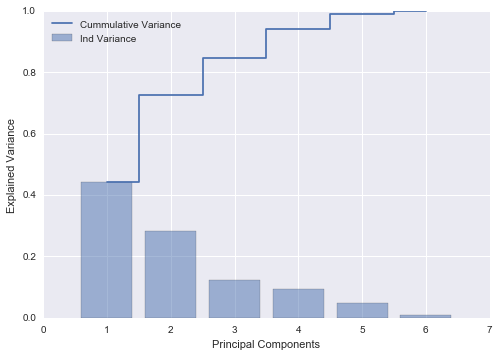

In [6]:
tot = sum(eigen_vals)
#var_exp = [(i / tot)*100 for i in sorted(eigen_vals, reverse=True)]
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
plt.bar(range(1,7), var_exp , alpha =0.5, align = 'center', label ='Ind Variance')
#plt.bar(range(1,7), pca.explained_variance_ratio_ , alpha =0.5, align = 'center', label ='Ind Variance')

plt.step(range(1,7), cum_var_exp, where = 'mid', label ='Cummulative Variance')

plt.ylabel ('Explained Variance')
plt.xlabel ('Principal Components')
plt.legend(loc = 'best')
plt.show()

In [7]:
#The explained pca ratio is shown below.
pca.explained_variance_ratio_

array([ 0.45961362,  0.40517227,  0.07003008,  0.04402344,  0.01502212,
        0.00613848])

In [8]:
pca_var_explained = pd.DataFrame({'Explained Variance Ratio': pca.explained_variance_ratio_})

pca_var_explained.insert(0, 'PCA', pca_names)
pca_var_explained['Explained Variance Percent'] = pca_var_explained['Explained Variance Ratio'].apply(round, args=[3]).apply(lambda x: x*100)
pca_var_explained

,PCA,Explained Variance Ratio,Explained Variance Percent
0,PC-1,0.459614,46.0
1,PC-2,0.405172,40.5
2,PC-3,0.070030,7.0
3,PC-4,0.044023,4.4
4,PC-5,0.015022,1.5
5,PC-6,0.006138,0.6


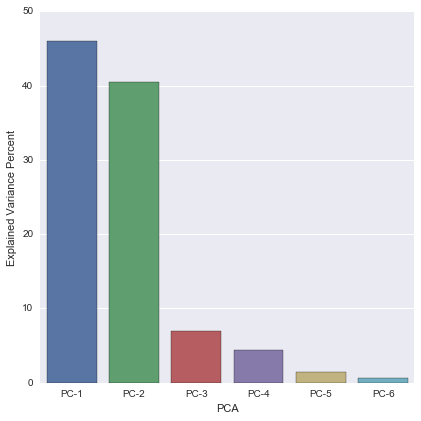

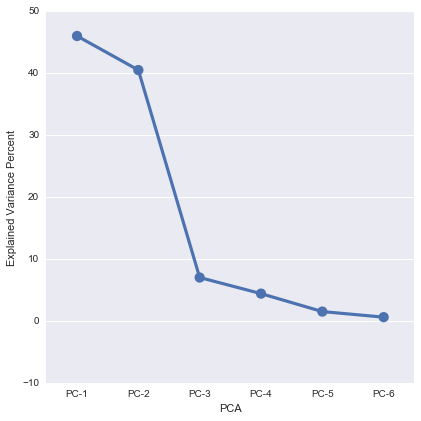

In [9]:
#f,(ax1,ax2) = plt.subplots(ncols=2, figsize=(20, 10))
g=sns.factorplot(x='PCA',y='Explained Variance Percent', data=pca_var_explained, kind='bar',size=6, legend=True)
g=sns.factorplot(x='PCA',y='Explained Variance Percent',data=pca_var_explained, size=6)


**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: 

The first pricipal component is at 46% which means that it contains 46% of the variance of the consumer segement dataset.
The second principal component has variance ratio 40% of the data. The principal compenent than drops to 7%, 4.4%, 1.5% and 0.6%. As seen from the second line plot we see a quick drop-off in the principal componenets from PC-2 to PC-3.
This is the elbow region and is considered to be a a good cutoff region in considering the number dimensions we need for our analysis. In our analysis I would consider 3 dimensions PC-1, PC-2 and PC-3 as they capture about 92% of the variance in data set.


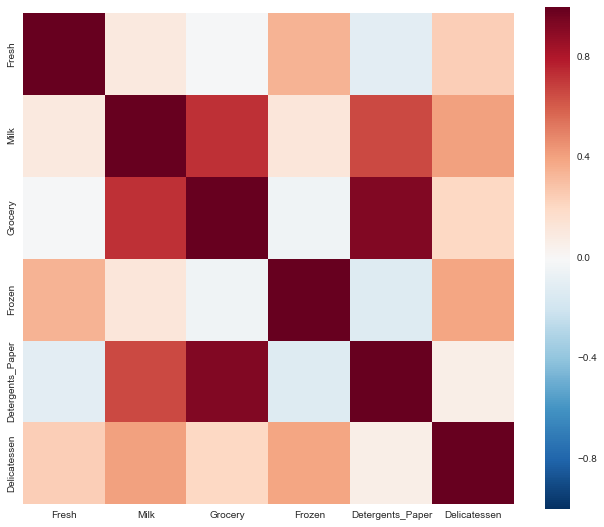

In [10]:
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#sns.heatmap(corr, mask=mask,vmax=.3,square=True, xticklabels=5, yticklabels=5,linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
sns.heatmap(corr, square=True, ax=ax)

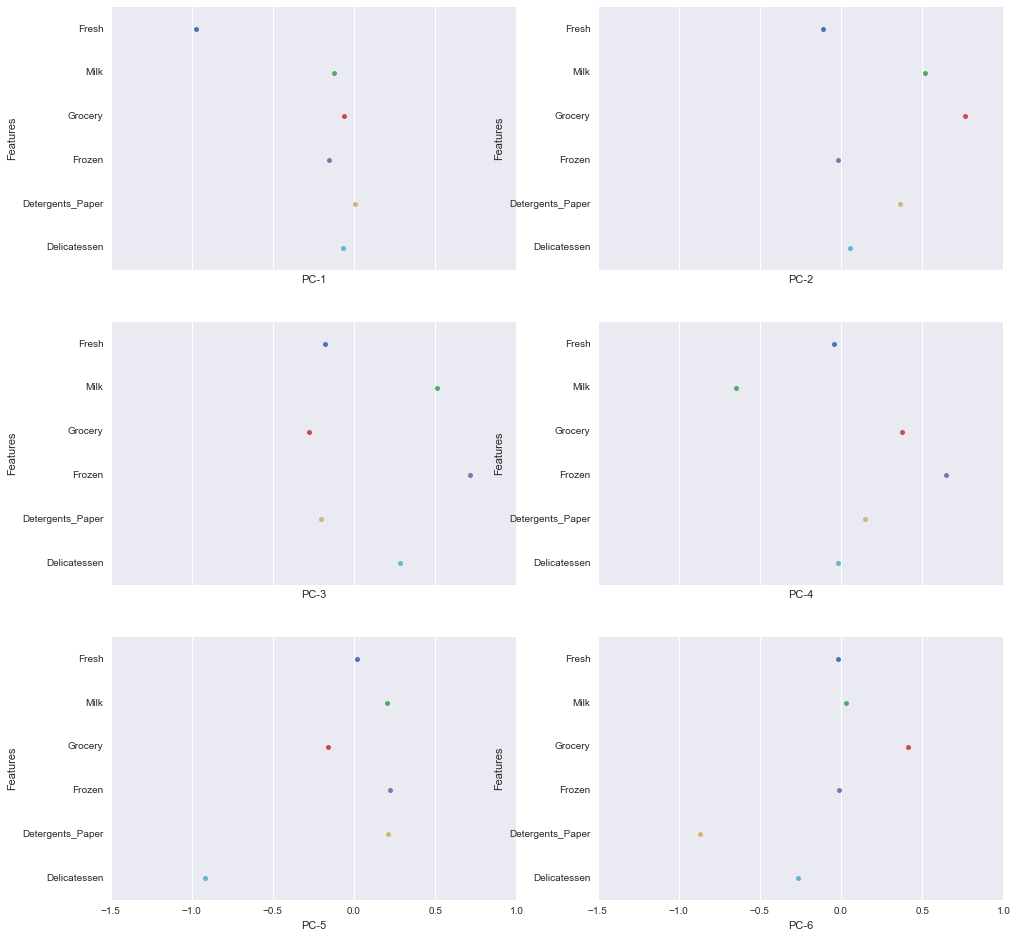

In [11]:
f, axes = plt.subplots(3, 2, figsize=(16, 16), sharex=True)
sns.despine(left=True)

sns.stripplot(pc_components['PC-1'],'Features',data=pc_components, ax = axes[0,0])
sns.stripplot(pc_components['PC-2'],'Features',data=pc_components, ax = axes[0,1])
sns.stripplot(pc_components['PC-3'],'Features',data=pc_components, ax = axes[1,0])
sns.stripplot(pc_components['PC-4'],'Features',data=pc_components, ax = axes[1,1])
sns.stripplot(pc_components['PC-5'],'Features',data=pc_components, ax = axes[2,0])
sns.stripplot(pc_components['PC-6'],'Features',data=pc_components, ax = axes[2,1])


In [12]:
pc_components

,Features,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6
0,Fresh,-0.976537,-0.110614,-0.178557,-0.041876,0.015986,-0.015763
1,Milk,-0.121184,0.515802,0.509887,-0.645640,0.203236,0.033492
2,Grocery,-0.061540,0.764606,-0.275781,0.375460,-0.160292,0.410939
3,Frozen,-0.152365,-0.018723,0.714200,0.646292,0.220186,-0.013289
4,Detergents_Paper,0.007054,0.365351,-0.204410,0.149380,0.207930,-0.871284
5,Delicatessen,-0.068105,0.057079,0.283217,-0.020396,-0.917077,-0.265417


**3)** What do the dimensions seem to represent? How can you use this information?

Answer: 
The values of the features in each of the principal components represent the feature's contribution to the principal component.
As shown in the above plot and also the table of pricipal components along with the features we see  how each feature contributes to the pricipal component.
The magnitude of the original features in the pricipal component is important. The negative or positve values of the features only indicate the relative realtionship between the features.

In principal component 1 (PC-1) we see that Fresh produce has the highest magnitude of 0.97 when we take the absolute value.
This indicates that first pricipal componenet is completly dominated by Fresh produce. This captures about 46% of the total variation in the data set.

Grocery, Milk and Detergents_Paper dominate in contributing to principal component 2 (PC-2). Principal Component 2 captures about 40% of the variation in the data. 

Looking at PC-3 we see that Milk and Frozen contribute in the formation of this component. PC-3 captures about 7% of the variation in th data.

Looking at the contribution of the features to the three components we can say that we have customers who buy fresh produce, a second group of customers which buys Grocery, Milk and Detergent_papers and a third group which buys milk and frozen products.
Although the first two groups dominate the Pricipal Components, the inclusion of the third group of customers cover up 92% of variability in the data.

Based on the features contribution to the principal components, we can identify the different groups of customers and their needs.

Since fresh products form a dominant feature in PC-1, the wholesale distributor can setup his supply chain and logitics to have the fresh produce available first thing in the morning as most people prefer to purchase fresh products in the morning.

On the same grounds the wholesale distributor could cater to the other two customer groups that buy Grocery, Milk and detergent_papers and Milk and Frozen products.





###ICA

In [13]:
std_scale = preprocessing.StandardScaler().fit(data)

In [14]:
dataStd = std_scale.transform(data)

In [15]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#dataStd = scaler.fit_transform(data)

ica = FastICA(n_components=6, random_state=1300)

S_ = ica.fit(dataStd).transform(dataStd)
A_ = ica.mixing_
data = data - data.mean()
#ica.fit_transform(data)
ic_names = ['IC-{}'.format(x) for x in xrange(1, 7)]
#data_trans= ica.fit(data)
# Print the independent components
ica_components= pd.DataFrame(ica.components_).T
ica_components.columns = ic_names
ica_components.insert(0, 'Features', data.columns)

ica_components
#plt.figure(figsize = (10,5))
#plt.pcolor(pd.DataFrame(ica.components_, columns = list(data.columns)))
#plt.show()


,Features,IC-1,IC-2,IC-3,IC-4,IC-5,IC-6
0,Fresh,-0.003419,-0.050261,0.002457,-0.002096,0.010910,-0.004895
1,Milk,0.019518,0.006588,-0.013122,-0.072069,0.001078,-0.001605
2,Grocery,0.108063,0.007161,0.070257,0.056893,-0.007384,-0.005661
3,Frozen,-0.007265,0.003225,0.001367,0.001593,-0.054056,-0.002520
4,Detergents_Paper,-0.133138,-0.011246,-0.014511,-0.018521,0.002578,0.002486
5,Delicatessen,-0.016144,0.002715,-0.005295,0.016806,0.016767,0.050952


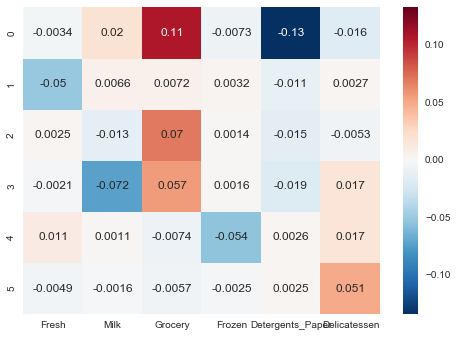

In [16]:
sns.heatmap(pd.DataFrame(ica.components_, columns= list(data.columns)), annot=True)

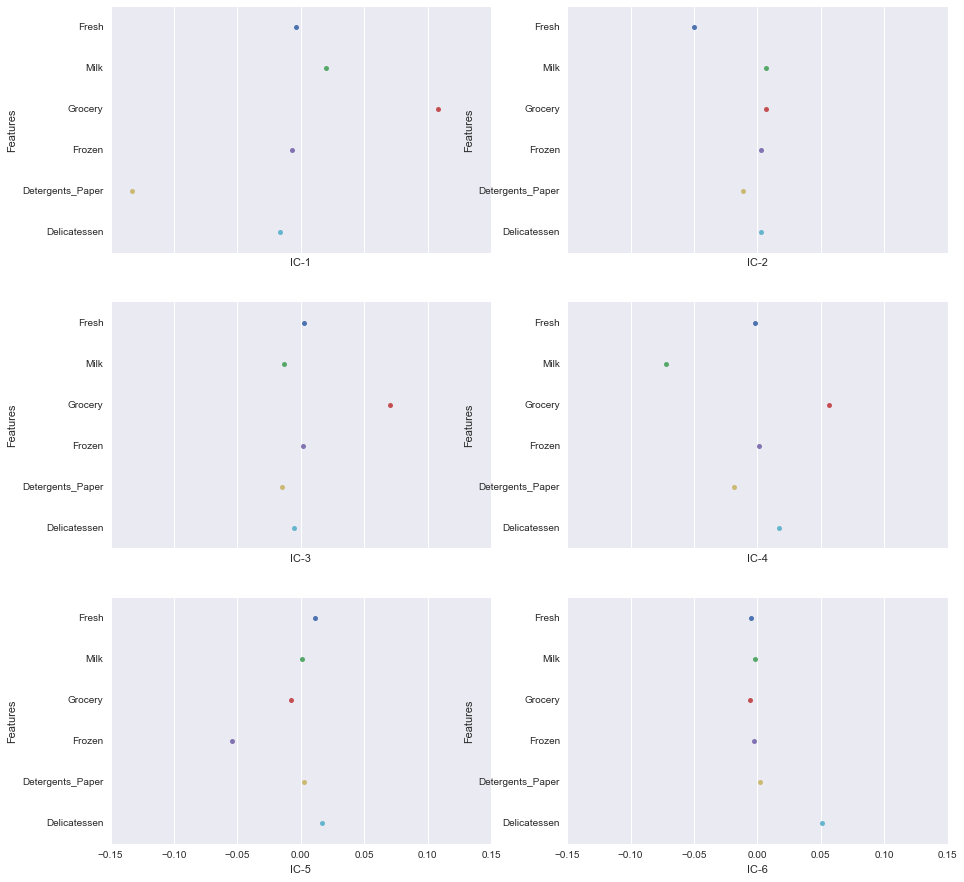

In [17]:
f, axes = plt.subplots(3, 2, figsize=(15, 15), sharex=True)
sns.despine(left=True)

sns.stripplot(ica_components['IC-1'],'Features',data=ica_components, ax = axes[0,0])
sns.stripplot(ica_components['IC-2'],'Features',data=ica_components, ax = axes[0,1])
sns.stripplot(ica_components['IC-3'],'Features',data=ica_components, ax = axes[1,0])
sns.stripplot(ica_components['IC-4'],'Features',data=ica_components, ax = axes[1,1])
sns.stripplot(ica_components['IC-5'],'Features',data=ica_components, ax = axes[2,0])
sns.stripplot(ica_components['IC-6'],'Features',data=ica_components, ax = axes[2,1])

**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

IC-1: In vector IC-1 we see positive values for grocery and negative values for detergent_papers. This tells us that this is a store that predominatly sells grocery items.
IC-2: In vector IC-2 we see the stores having a higher weight although negative for fresh products. This shows that these are predominatly stores that sell fresh produce.
IC-3: In vector IC-3 we see the stores having a higher weight for grocery items. This shows that these are predominatly stores that sell general grocery
IC-4:In vector IC-4 we see positive values for grocery and negative values for milk. This tells us that these stores prefer diary/milk products. These stores could be self making ice cream stores or coffee shops that predominatly want milk or sell milk based products.
IC-5:In vector IC-5 we see higher weight value for frozen products. We also see that their are average scores for that products. This tends to tell us that these are stores that prefer frozen products predominatly.
IC-6:In vector IC-6 we see positive values for delicatessen and this stores are probably Deli type of place.

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

### K-Means
K-means clustering is an unsupervised machine learning algorithm. The goal of k-means is to cluster or partition observations into k clusters. The observations in each cluster have similar characteristics or feature vectors to each other. 
Based on the number of clusters we need we initally choose a cluster centroid.
We then assign the observations to each of the clusters based on the minimum distance between each observation and the cluster centroid.
Below are the steps for K-means Algorithms

Step 1: Initialize cluster centers
Step 2:Assign observations to closest cluster center
Step 3:Revise cluster centers as a mean of assigned observations
Step 4:Repeat Step 1 and 2 untill convergence.

### Gaussian Mixture Models

Gaussina Mixture Models is also an unsupervised ML algorithm. The goal here also is to cluster observations into K-clusters. 
Gaussian Mixture Model is a probabilistic model. The model assumes all the observations are generated from a mixutre of Gaussian distributions. The observations will have mean and variance for each cluster.

Expectation Maximization (EM) algorithm is used to estimate the cluster responsibilities or assignments given the current paramater estimates and this is refered as the E-Step.

Maximizing likelihood over the parameters give current reponsibilities or current assignments and this is called hte M-step.


### K-Means VS Gaussian Mixture Models

#### K-Means Advantages
K-Means is a fast algorithm for clustering. This is faster then algoritms asuch as the Gaussian Mixture Models.
It is a very simple algorithm to implement and understand.


#### K-Means Disadvantages
K-Means algorithm can get stuck at local minima.
It is not a robust algorithm. It can have difficultities with outliers and when the shape of the clusters are close to spherical shapes.
K-Means  

#### Gaussian Mixture Models Advantages

Fast Algorithm
The algorithm does not bias cluster sizes to a have specific structures which means cluster assignment is more flexible in Gaussian Mixture Models as compared to the K-means algorithm.
In GMM observations can be assigned to different clusters. This is based on the probability of the observation that is generated from each cluster's normal distribution.

#### Gaussian Mixture Models Disadvantages
Algorithm diverges and finds solutions with infnite likelihood values due to the difficulty in estimating the covariance matrices, when we have insufficiently many observation points per cluster.


**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [18]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [57]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
reduced_data = PCA(n_components =2).fit_transform(dataStd)
print reduced_data[:10]  # print upto 10 elements

[[-0.19329055  0.30509996]
 [-0.4344199   0.32841262]
 [-0.81114323 -0.8150957 ]
 [ 0.77864783 -0.65275373]
 [-0.16628726 -1.27143372]
 [ 0.15616993  0.29514099]
 [ 0.3352884   0.52500326]
 [-0.14058643  0.23099269]
 [ 0.51731954  0.65936283]
 [-1.59210908  0.74101133]]


In [58]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

clusters = KMeans(n_clusters=2).fit(reduced_data)
print clusters

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


In [59]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [60]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

centroids = clusters.cluster_centers_
print centroids

[[ 0.41858927 -0.04642563]
 [-3.67428358  0.40751388]]


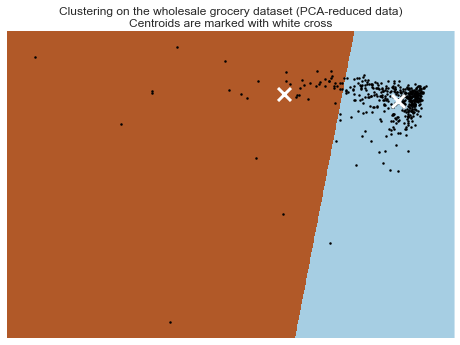

In [61]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

### K-Mean 3 Clusters
We plot the K-means for 3 clusters below

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)
[[  0.42941908  -0.02740804]
 [ -3.52778282   0.92939702]
 [ -4.51308525 -10.04070335]]


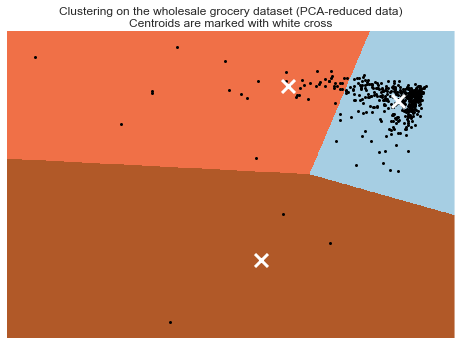

In [62]:
#reduced_data = PCA(n_components =3).fit_transform(dataStd)
clusters = KMeans(n_clusters=3).fit(reduced_data)
print clusters

# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])


centroids = clusters.cluster_centers_
print centroids

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=6)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
### K-Mean 4 Clusters
We plot the K-means for 4 clusters below

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=4, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)
[[ -1.30128824   0.73156912]
 [  0.68468443  -0.15620376]
 [ -7.05027932   0.63634999]
 [ -4.51308525 -10.04070335]]


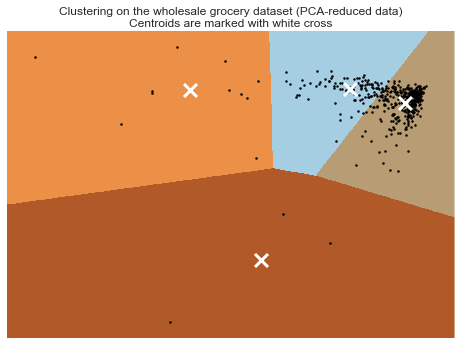

In [41]:
clusters = KMeans(n_clusters=4).fit(reduced_data)
print clusters

# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])


centroids = clusters.cluster_centers_
print centroids

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
### K-Mean 6 Clusters
We plot the K-means for 6 clusters below

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=6, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)
[[ -2.91872278   0.81930466]
 [  0.89260978   0.16673174]
 [ -4.51308525 -10.04070335]
 [ -8.73369878   1.3469361 ]
 [ -0.55808956   0.59090171]
 [  0.26549736  -1.6537929 ]]


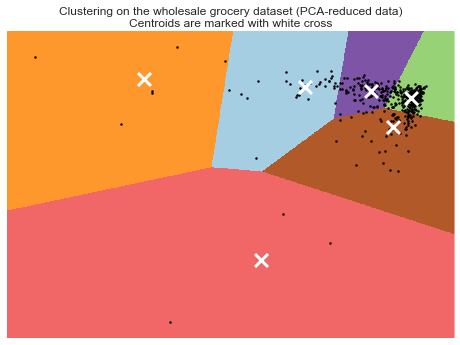

In [42]:
clusters = KMeans(n_clusters=6).fit(reduced_data)
print clusters

# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])


centroids = clusters.cluster_centers_
print centroids

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

### GMM 2 Clusters
We plot the GMM for 2 clusters below

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)
[[ 6.84912627  7.85687596]
 [ 0.5119875   0.50682928]]


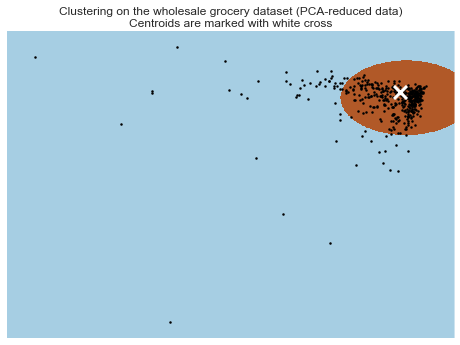

In [47]:
clusters = GMM(n_components=2).fit(reduced_data)
print clusters

# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])


centroids = clusters.covars_
print centroids

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
### GMM 3 Clusters
We plot the GMM for 3 clusters below

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=3, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)
[[  0.11615284   0.49051884]
 [  1.03175067   0.29906699]
 [ 11.10138965  10.78224738]]


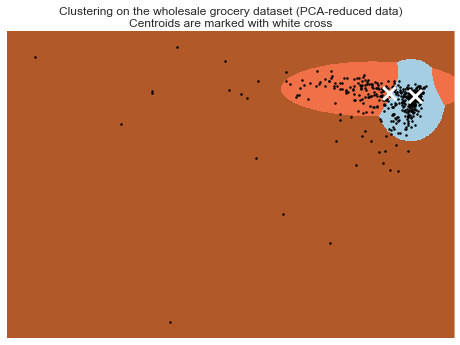

In [49]:
clusters = GMM(n_components=3).fit(reduced_data)
print clusters

# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])


centroids = clusters.covars_
print centroids

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
### GMM 4 Clusters
We plot the GMM for 4 clusters below

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=4, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)
[[ 1.01385672  0.29598949]
 [ 0.10963124  0.4808358 ]
 [ 3.73523015  9.53572759]
 [ 9.45164346  1.59460877]]


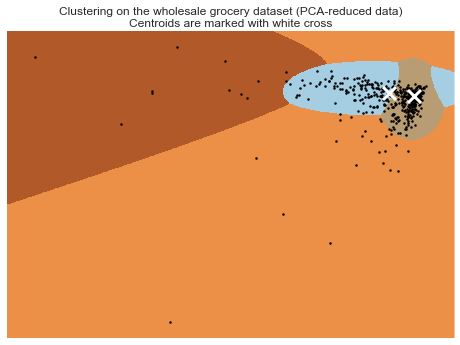

In [50]:
clusters = GMM(n_components=4).fit(reduced_data)
print clusters

# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])


centroids = clusters.covars_
print centroids

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
### GMM 6 Clusters
We plot the GMM for 6 clusters below

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=6, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)
[[  0.39066684   0.18297977]
 [  0.0406176    0.25129404]
 [  0.40310024   1.30508149]
 [  1.22471761   0.1682323 ]
 [  7.09347121   2.10649056]
 [  5.33258737  19.95705774]]


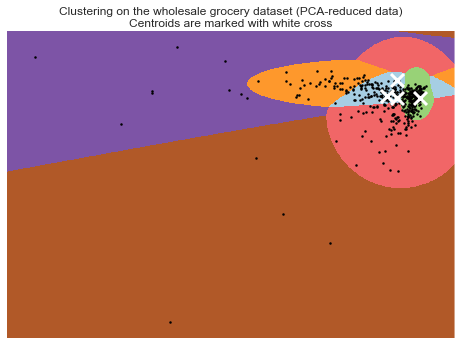

In [51]:
clusters = GMM(n_components=6).fit(reduced_data)
print clusters

# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])


centroids = clusters.covars_
print centroids

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

### K-means VS GMM

Looking at the clustering plots of k-means and GMM model, the GMM model looks to be a better choice, but choice of clusters is debatable.

Looking at the plots 2 clusters looks to capture the observations well.

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)
[[ 0.5119875   0.50682928]
 [ 6.84912627  7.85687596]]


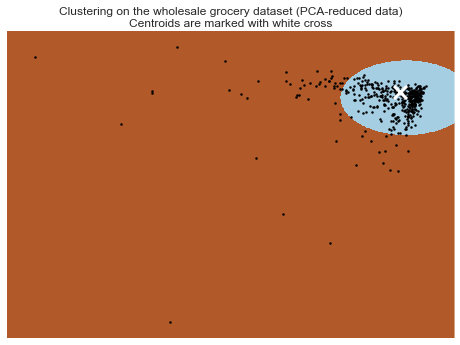

In [64]:
clusters = GMM(n_components=2).fit(reduced_data)
print clusters

# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])


centroids = clusters.covars_
print centroids

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: 

We see two distinct clusters of data. Looking at the decision boundary we can say that the wholesale grocery distributes primarily to two different kinds of customers. The smaller blue cluster where lot of observation points are clustered can be assumed to be a large number of small grocery stores. 

The brown cluster with a lot scatter points indicate large volume customers.

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: 

PCA along with the Gaussian Mixture Model shows the bets results. PCA helps us to reduce the number of dimensions. With the reduced dimensions from PCA we visualized the observations that best explained thevariance in the data set.

GMM provided a better clustering then the K-means algorithm. Since GMM uses the expectation maximization alogorithm it was useful in clustering the data as the decision boundary was not clear.

Clustering the data using GMM helped in identifying the different types of customers small volume and large volume customers.
Although K-means also captured the two clusters the clusters were a mixture of both small volume and large volume customers.

**9)** How would you use that technique to help the company design new experiments?

Answer: 

Using the GMM we idetify the two different customer types.
Once the customers were identified we could change the delivery schedules to the small  volume and large volume customers.
For large customers we could use larger trucks with more goods and lower delievry schedules.
For smaller customers we could use smaller trucks with frequent schedules.
This experiment would hopefully reduce the complaints.

Once these chnages have been applied we can keep a note if the compliants from customers increase or decrease.
We could do hypothesis teseting and significant testing techniques to analyze the effects due to the implemented changes.


**10)** How would you use that data to help you predict future customer needs?

Answer: 

Once we have defined the customer segments, delivery schedules, hypothesis testing we can develop models to reduce complaints, to help increase profit, growth and supply of the products that caters to the particular segment. 
If we see growth potential in the high volume customers and see a reduction in the complaints we could improve the supply chain and logitics to the high volume customers.

On the same grounds we could develop a better supply chain by developing small warehouses that are closer to the small volume customers. By developing these smaller warehouses closer to the small volume customers the whole sale ditributor could use bigger trucks to supply large volume and diverse products to these small warehouses that would cater to the requirements of the small volume customers.
Once the warehouses are stacked up the distributor could use smaller fuel efficent transportation to supply the small customers.
By using this model we could expect a reduction in complaints and also reduce the transportation costs for the whole sale distributor.

Using the reduced data We could use this data on a supervised model to predict the new customer in each segments given their demand quantities. 

Thus we would expect future data to fall right in place with the clusters we have created. We can verify that our model is working this way. However, if most of the new points are outliers in our model, we would need to recompute. 

